In [19]:
import threading
import os
import csv

max_dt = 24 * 3

def extract_tracklets(camera_dir, cam_id):
    csv_path = os.path.join(camera_dir, "coords_fib_cam_{}.csv".format(cam_id))
    with open(csv_path, newline='') as csvfile:
        ages = dict()
        tracklets = dict()
        last_frame = 0 
        reader = csv.DictReader(csvfile)
        for row in reader:
            bbox = [int(row[col]) for col in ["x_top_left_BB","y_top_left_BB","x_bottom_right_BB","y_bottom_right_BB"]]
            # print(bbox)
            curr_frame = int(row["frame_no_cam"])
            if curr_frame != last_frame:
                last_frame = curr_frame
                print(last_frame)
        

def generate_tracklets(dataset_dir = "raw_data/videos/MTA_ext_short/test", ids=[0,1,2,3,4,5]):
    ids = set(ids)
    jobs = [] 
    for _id in ids:
        cam_path = os.path.join(dataset_dir,"cam_{}".format(_id))
        jobs.append(threading.Thread(target=extract_tracklets, args=(cam_path,_id)))
    for job in jobs:
        job.start()
    for job in jobs:
        job.join()

    
def find_candidate_matches(search_tracklet, all_tracklets):
    cam, start_frame, _, _ = search_tracklet[0]
    cam, stop_frame, _, _ = search_tracklet[-1]
    for 
    
    pass
# tracklet 
# cam_id, frame_num, person_id, bbox
#generate_tracklets()
sample_tracklets = [(0,0,0,[0,0,0,0])]

11
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18

219

2013


212
3
4
54


2256


6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
237
24
25
26
27
28
29
30
31
3249
33
34
35

36
37
8
38
50

39951

10
11
12
13
14
15
16
40
17
52
1841
42
43
44
45
46
47
48
49
50
51
52
53
54
55

56
53

54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
5719
102

103
104
105
106
107
108
109
110
111
112
113
1145820
21
22
23
24
25

26

27
28
29
30
31
32
33
59
60
1153461

35116

117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
14962
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180


181
182
183
184
185
186
3663187

37
64188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203

65
66
67
68


571
344
345
346
347

572
573
574
575
576
577348
578
579
580
581
582
583
584
585
586
587
588
1738
349
350
351
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
589
352
353
354
355
3561753
590
591
592
593
594
595
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778

596
597
598
599
600
601
602
603
604
605
606
607
608
609

6101779357

1780
611358


359
360
361
362
363
364
1781612

1782613365


3661783614
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
615
616

617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
3671811
634

635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652

1812368653


3696541813


3701814
1815
1816
1817
1818
1819
1820655


1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1

6531099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117


3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
11183801
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137

1138
6543802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
38561139
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879


1140
1141
1142
1143
1144
1145
1146
1147
1

1520
4847
4848
4849
4850
4851
4852
4853
4854
4855
4856
4857
4858
4859
4860
4861
4862
4863
4864
4865
4866
4867
4868
4869
4870
4871
4872
4873
4874
4875
4876
4877
4878
4879
4880
4881
4882
4883
4884
4885
4886
4887
4888
4889
4890
4891
4892
4893
4894
4895
4896
1521834
4897
4898
4899
4900
4901
4902
4903
4904
4905
4906
4907
4908
4909
4910
4911
4912
4913
4914
4915
4916
4917
4918
4919
4920


8351522
836
1523

1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541837

1542
8381543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
839
1559

1560
1561
1562
1563
1564840
841
842
843
844
845

1565
1566
1567846
847

1568848

1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
8491590
850
1591
1592
1593
1594
1595

8511596
852
853

1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611854

8551612
1613
1614

8561615

8571616
858
859
860
861
862

1617
1618
1619
1620
1621
162

1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
19982499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2

2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
28963498
2897
2898
2899
2900
2901
2902
2903
2904
2905
3499

3500
3501
29063502
2907
2908
2909
2910
2911
2912
2913
2914
2915

29163503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
2917
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530

35312918
2919
2920
2921
2922
3532
2923
2924
2925

35332926
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
2927
2928

2929
2930
2931
2932
2933
2934
35522935
3

46313871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881

46323882
4633
4634
4635
4636
4637
4638
4639
4640
4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
3883
4653
4654
4655
4656
4657
4658
4659
4660
4661
4662
4663
4664
4665
4666
4667
4668
4669
4670
4671
4672
4673
4674

3884
3885
3886
38874675
3888
3889
3890
3891
3892

46763893
4677
4678
4679
4680
4681
4682
4683
4684
4685
3894
4686
4687
4688
4689
4690
4691
4692

3895
4693
4694
4695
4696
4697
3896
38974698
3898
3899
3900
3901
3902
3903

4699
4700
4701
4702
4703
4704
4705
4706
4707
4708
4709
4710
4711
4712
4713
4714
4715
4716
4717
4718
4719
39044720
3905
3906
3907
3908
3909
3910
3911
3912
3913

3914
47213915
3916
3917
3918

4722
47233919
3920
3921
3922
3923

39244724
4725
4726
4727
4728
4729
4730

4731
4732
4733
4734
4735
4736
4737
47383925
4739
4740
4741

4742
4743
4744
4745
4746
4747
47483926
4749
4750
4751
4752
4753
4754
4755

3927
4756
4757
4758
4759
4760
4761
4762
4763
4764
39284765
3929
3930
3931
3932
3933
3934

3935


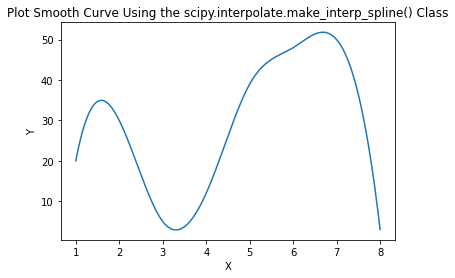

In [20]:
import numpy as np
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
 
# Dataset
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([20, 30, 5, 12, 39, 48, 50, 3])
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.make_interp_spline() Class")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()